### Import dependencies

In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
#view settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
pd.set_option('display.max_colwidth', None)

#reset
# pd.reset_option('all')

### Load CSV into DF, remove null and unused column

In [331]:
df = pd.read_csv('../dataset/from_survey/clean_result.csv')

In [332]:
df.describe(include='all')

,gender,age,ethnicity,ethnicity_o,edu_level,total_child,f_child,f_child_age,m_child,m_child_age,freq_meals_daily,freq_eat_out_weekly,reasons_eat_out,reasons_eat_out_o,reasons_eat_in,reasons_eat_in_o,freq_fast_food,reasons_fast_food,preference_cooking_method,preference_cooking_method_o,reasons_preference_cooking_method,reasons_preference_cooking_method_o,who_make_decisions,who_make_decisions_o,type_grocery,type_grocery_o,freq_fresh_produce,freq_prepackaged_meal,consider_grocery_nutritional_value,child_influence_more_healthy_food,child_influence_new_recipe,child_influence_grocery,include_child_in_meal_planning,child_influence_less_unhealthy_food,prepare_separate_meals,child_influence_learning_healthy_diet,child_influence_overall_healthier_diet,reasons_child_influence,reasons_no_child_influence,reasons_no_child_influence_o,follow_up,email
count,63,63.000000,63,12,63,63.000000,63.000000,63,63.000000,63,63,63,63,3,63,6,63,33,63,8,63,6,63,6,63,4,63,63,63,63,63,63,63,63,63,63,63,63,63,2,1,1
unique,2,NaN,4,3,4,NaN,NaN,15,NaN,17,4,4,18,1,14,2,3,10,19,5,19,2,7,2,14,3,4,3,3,3,3,3,3,3,3,3,3,9,13,1,1,1
top,Female,NaN,Chinese,Caucasian,University,NaN,NaN,[''],NaN,[''],3 meals,1-2 times,I do not eat out at all,"Working at office, easier to eat outside than pack food","Health and nutrition, Cost savings, Family bonding time",Convenience (cooking for all at once as we’ve a big family ),Rarely or never,Convenience,"Boiling/steaming, Stir frying",Air Frying,"Health and nutrition, Taste and preference, Culinary traditions",Baking grilling etc requires skill and time for prep etc,Myself (parents),What do you mean by activities?,"Fruits, Vegetables, Grains, Proteins, Dairy products","Coffee, Milk, tea",Every shopping trip,Occasionally,"Yes, I consider nutritional information","Yes, to some extent","Yes, occasionally","Yes, moderately","Yes, occasionally","No, not at all","No, not at all","Yes, to some extent","Yes, to some extent",I value my child(ren)’s input and adapt my own diet to accommodate shared mealtime experiences,Not applicable,"We already have a healthy diet and their ""influence"" would downgrade it",Yes,stellacs.2020@scis.smu.edu.sg
freq,53,NaN,31,6,28,NaN,NaN,19,NaN,19,42,27,8,3,13,3,30,9,9,3,6,3,28,3,15,2,34,32,34,31,26,36,26,30,30,33,36,15,18,2,1,1
mean,NaN,46.666667,NaN,NaN,NaN,2.047619,1.000000,NaN,0.984127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.156348,NaN,NaN,NaN,1.098805,0.933257,NaN,0.851792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,34.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,41.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,46.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,50.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
df = df.fillna('')

In [334]:
df = df.drop(columns=['follow_up', 'email'])

In [335]:
#remove row where total_child == 0
df = df[df['total_child'] != 0]
df = df.reset_index(drop=['index'])

### Data preprocessing

#### Change type string to int

In [336]:
# for multivalued fields

import ast 

for i in range (0, df.shape[0]):

    # List of column names you want to process
    columns_to_process = ['f_child_age', 'm_child_age']

    # Loop through the specified columns
    for column in columns_to_process:
        # Get the list at the specified row and column
        original_string = df.at[i, column]
        
        if original_string == "['']":
            df.at[i, column] = [0]
        
        else:
            try:
                result_list = ast.literal_eval(original_string)
                
                # Update the DataFrame with the filtered list
                df.at[i, column] = result_list
                
            except ValueError:
                pass

In [337]:
# for non multivalued fields
df[['age', 'total_child', 'f_child', 'm_child']] = df[['age', 'total_child', 'f_child', 'm_child']].apply(pd.to_numeric, errors='coerce')

#### Calculate child's avg age

In [338]:
df['child_avg_age'] = 0

for i in range (0, df.shape[0]):
    try:
        f_child_age = df.at[i, 'f_child_age']
        m_child_age = df.at[i, 'm_child_age']
        sum_of_child_age = sum(f_child_age) + sum(m_child_age)        
        total_child = df.at[i, 'total_child']
        
        # Calculate avg and update the df
        df.at[i, 'child_avg_age'] = sum_of_child_age/total_child
        
    except TypeError:
        pass

## EDA

#### Demographic info

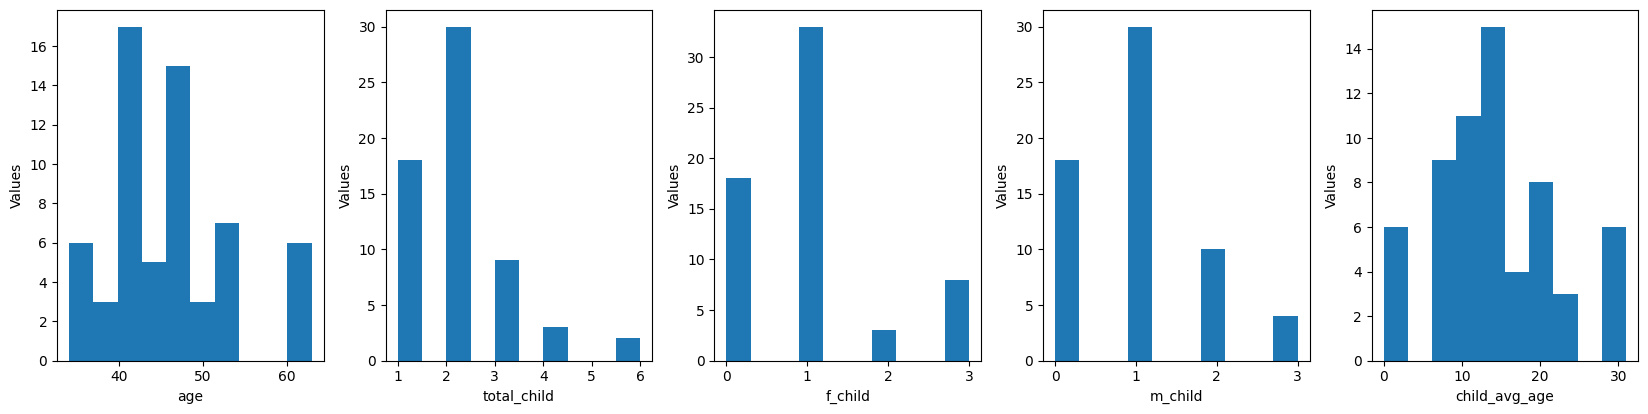

In [339]:
numerical_variables = [
    'age', 'total_child', 'f_child', 'm_child', 'child_avg_age'
]

# Create a grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(20, 12))
axes = axes.ravel()

# Plot each categorical variable
for i, category in enumerate(numerical_variables):
    ax = axes[i]
    df[category].plot(kind='hist', ax=ax)
    ax.set_xlabel(category)
    ax.set_ylabel('Values')
    plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Remove any empty subplots (if there are more subplots than categories)
for i in range(len(numerical_variables), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

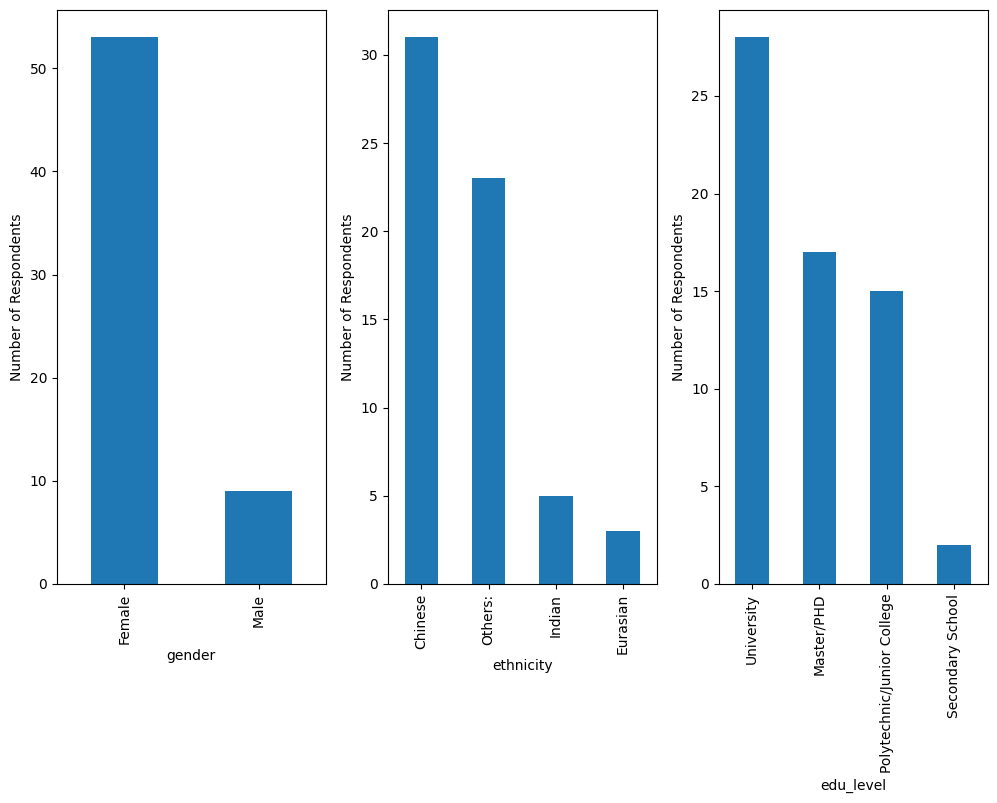

In [340]:
categorical_variables = [
    'gender','ethnicity', 'edu_level'
]

# Create a grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(20, 22))
axes = axes.ravel()

# Plot each categorical variable
for i, category in enumerate(categorical_variables):
    ax = axes[i]
    counts = df[category].value_counts()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel(category)
    ax.set_ylabel('Number of Respondents')
    plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Remove any empty subplots (if there are more subplots than categories)
for i in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Issue with skewed data?

Get a list of other ethnicities

In [341]:
from collections import Counter

list_of_ethnicity_o = list(df['ethnicity_o'].loc[df['ethnicity'] == 'Others:'])

element_counts = Counter(list_of_ethnicity_o)

duplicates_count = {item: count - 1 for item, count in element_counts.items() if count > 1}

print(duplicates_count)


{'Filipino': 2, '': 10, 'European': 2, 'Caucasian': 5}


#### Frequency of types of meals

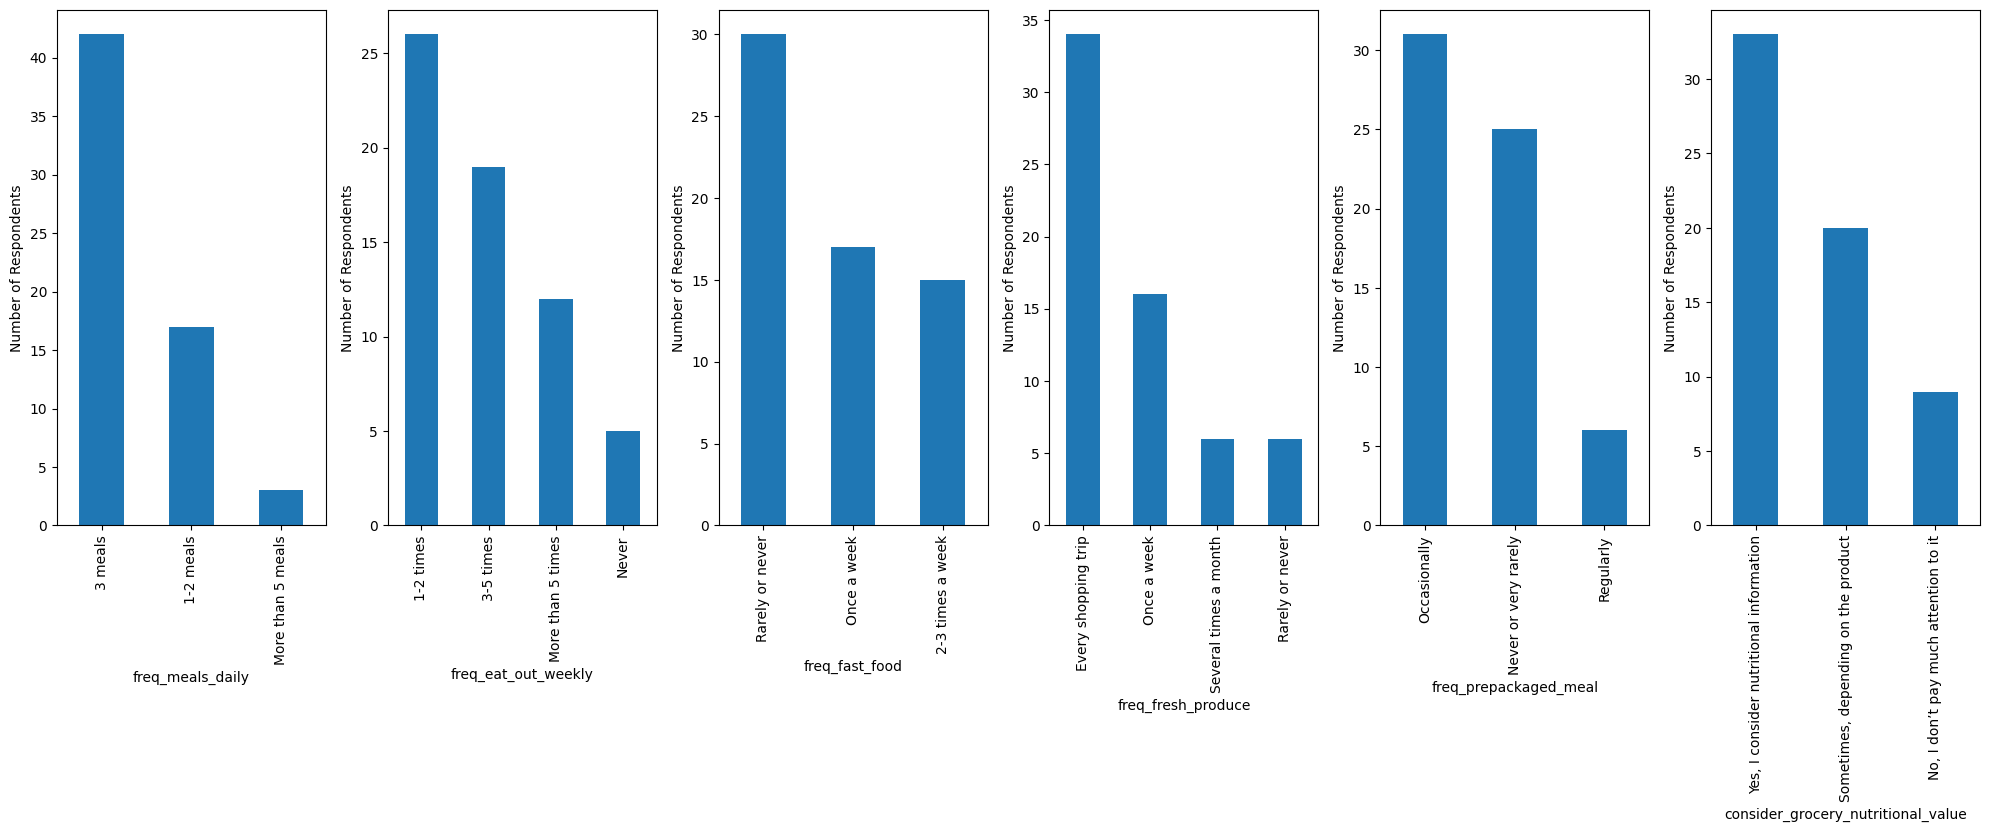

In [342]:
categorical_variables = [
    'freq_meals_daily',
    'freq_eat_out_weekly', 'freq_fast_food', 'freq_fresh_produce',
    'freq_prepackaged_meal', 'consider_grocery_nutritional_value'
]

# Create a grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(20, 22))
axes = axes.ravel()

# Plot each categorical variable
for i, category in enumerate(categorical_variables):
    ax = axes[i]
    counts = df[category].value_counts()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel(category)
    ax.set_ylabel('Number of Respondents')
    plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Remove any empty subplots (if there are more subplots than categories)
for i in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Most respondents say that they eat on average 3 meals a day (21 meals per week) and on average 1-2 meals outside. We can assume that for most people, most meals are eaten at home.

#### Child influence on aspects of diet

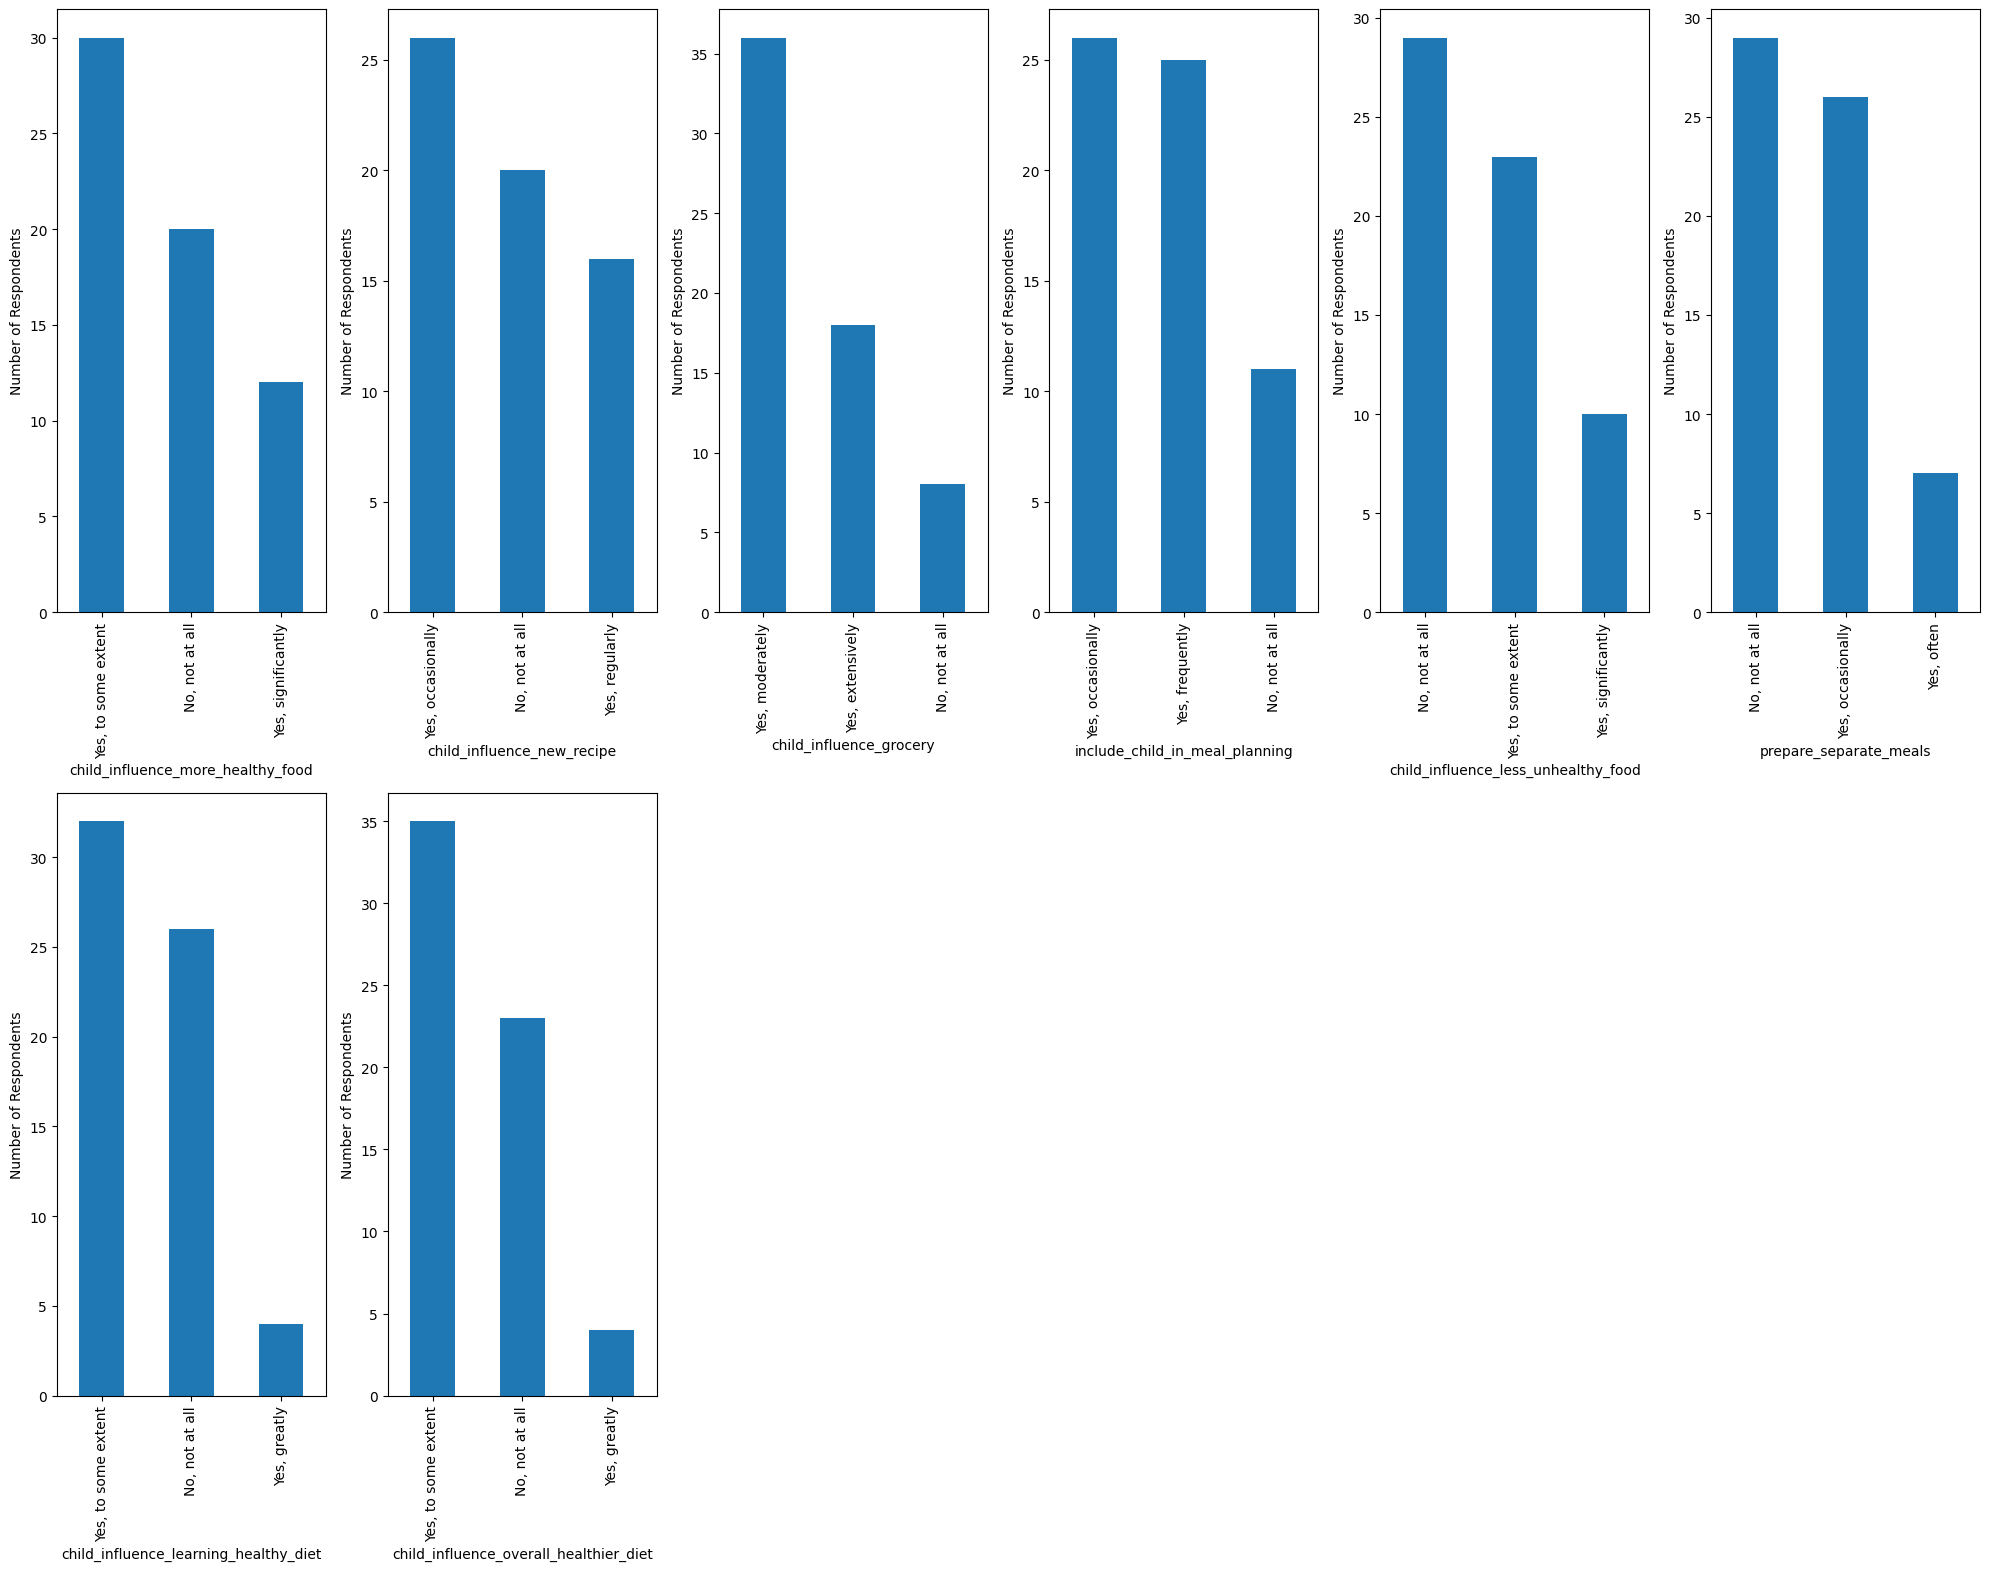

In [343]:
categorical_variables = [
    'child_influence_more_healthy_food', 'child_influence_new_recipe',
    'child_influence_grocery', 'include_child_in_meal_planning',
    'child_influence_less_unhealthy_food', 'prepare_separate_meals',
    'child_influence_learning_healthy_diet', 'child_influence_overall_healthier_diet'
]

# Create a grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(20, 22))
axes = axes.ravel()

# Plot each categorical variable
for i, category in enumerate(categorical_variables):
    ax = axes[i]
    counts = df[category].value_counts()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel(category)
    ax.set_ylabel('Number of Respondents')
    plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Remove any empty subplots (if there are more subplots than categories)
for i in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Child influence on aspects of diet in correlation to demographics data

##### Preprocess

In [344]:
influence_variables = [
    'child_influence_more_healthy_food', 'child_influence_new_recipe',
    'child_influence_grocery', 'include_child_in_meal_planning',
    'child_influence_less_unhealthy_food', 'prepare_separate_meals',
    'child_influence_learning_healthy_diet', 'child_influence_overall_healthier_diet'
]
for variable in influence_variables:
    list_of_responses = list(df[variable])

    element_counts = Counter(list_of_responses)

    duplicates_count = {item: count - 1 for item, count in element_counts.items() if count > 1}

    print(duplicates_count)

{'Yes, significantly': 11, 'Yes, to some extent': 29, 'No, not at all': 19}
{'Yes, occasionally': 25, 'No, not at all': 19, 'Yes, regularly': 15}
{'Yes, extensively': 17, 'Yes, moderately': 35, 'No, not at all': 7}
{'Yes, occasionally': 25, 'Yes, frequently': 24, 'No, not at all': 10}
{'Yes, to some extent': 22, 'Yes, significantly': 9, 'No, not at all': 28}
{'Yes, occasionally': 25, 'No, not at all': 28, 'Yes, often': 6}
{'Yes, to some extent': 31, 'No, not at all': 25, 'Yes, greatly': 3}
{'Yes, to some extent': 34, 'No, not at all': 22, 'Yes, greatly': 3}


In [345]:
# Dictionary to define influence level

response_to_influence_level = {
    'Yes, significantly': 2, 
    'Yes, to some extent': 1, 
    'No, not at all': 0,
    'Yes, regularly': 2,
    'Yes, occasionally': 1, 
    'Yes, extensively': 2, 
    'Yes, moderately': 1,
    'Yes, frequently': 2, 
    'Yes, often': 2,
    'Yes, greatly': 2
    }

In [346]:
# Encode influence level variables

df_influence_factors_encoded = df

for i in range (0, df_influence_factors_encoded.shape[0]):

    # List of column names you want to process
    columns_to_process = ['child_influence_more_healthy_food', 'child_influence_new_recipe',
    'child_influence_grocery', 'include_child_in_meal_planning',
    'child_influence_less_unhealthy_food', 'prepare_separate_meals',
    'child_influence_learning_healthy_diet', 'child_influence_overall_healthier_diet']

    # Loop through the specified columns
    for column in columns_to_process:        
        # Get the response
        response = df.at[i, column]
        
        # Encode
        df_influence_factors_encoded.at[i, column] = response_to_influence_level[response]
                

In [347]:
# Drop irrelevant columns

df_influence_factors_encoded = df_influence_factors_encoded.drop(columns=['ethnicity_o','freq_meals_daily',
       'freq_eat_out_weekly', 'reasons_eat_out', 'reasons_eat_out_o',
       'reasons_eat_in', 'reasons_eat_in_o', 'freq_fast_food',
       'reasons_fast_food', 'preference_cooking_method',
       'preference_cooking_method_o', 'reasons_preference_cooking_method',
       'reasons_preference_cooking_method_o', 'who_make_decisions',
       'who_make_decisions_o', 'type_grocery', 'type_grocery_o',
       'freq_fresh_produce', 'freq_prepackaged_meal',
       'consider_grocery_nutritional_value',])

In [348]:
# Dictionary of education level to ordinal data
edu_level_to_num = {'Master/PHD': 4, 'Polytechnic/Junior College': 2, 'University': 3, 'Secondary School': 1}

# Encode edu_level
for i in range (0, df_influence_factors_encoded.shape[0]):

    response = df.at[i, 'edu_level']
    
    # Encode
    df_influence_factors_encoded.at[i, 'edu_level'] = edu_level_to_num[response]

In [349]:
# for non multivalued fields
df_influence_factors_encoded[['edu_level', 'child_influence_more_healthy_food', 'child_influence_new_recipe',
    'child_influence_grocery', 'include_child_in_meal_planning',
    'child_influence_less_unhealthy_food', 'prepare_separate_meals',
    'child_influence_learning_healthy_diet', 'child_influence_overall_healthier_diet']] = df_influence_factors_encoded[['edu_level', 'child_influence_more_healthy_food', 'child_influence_new_recipe',
    'child_influence_grocery', 'include_child_in_meal_planning',
    'child_influence_less_unhealthy_food', 'prepare_separate_meals',
    'child_influence_learning_healthy_diet', 'child_influence_overall_healthier_diet']].apply(pd.to_numeric, errors='coerce')

In [350]:
#Get keys of all numerical variable
df_influence_factors_encoded.describe().keys()

Index(['age', 'edu_level', 'total_child', 'f_child', 'm_child',
       'child_influence_more_healthy_food', 'child_influence_new_recipe',
       'child_influence_grocery', 'include_child_in_meal_planning',
       'child_influence_less_unhealthy_food', 'prepare_separate_meals',
       'child_influence_learning_healthy_diet',
       'child_influence_overall_healthier_diet', 'child_avg_age'],
      dtype='object')

#### Correlation between demographics and child influence level

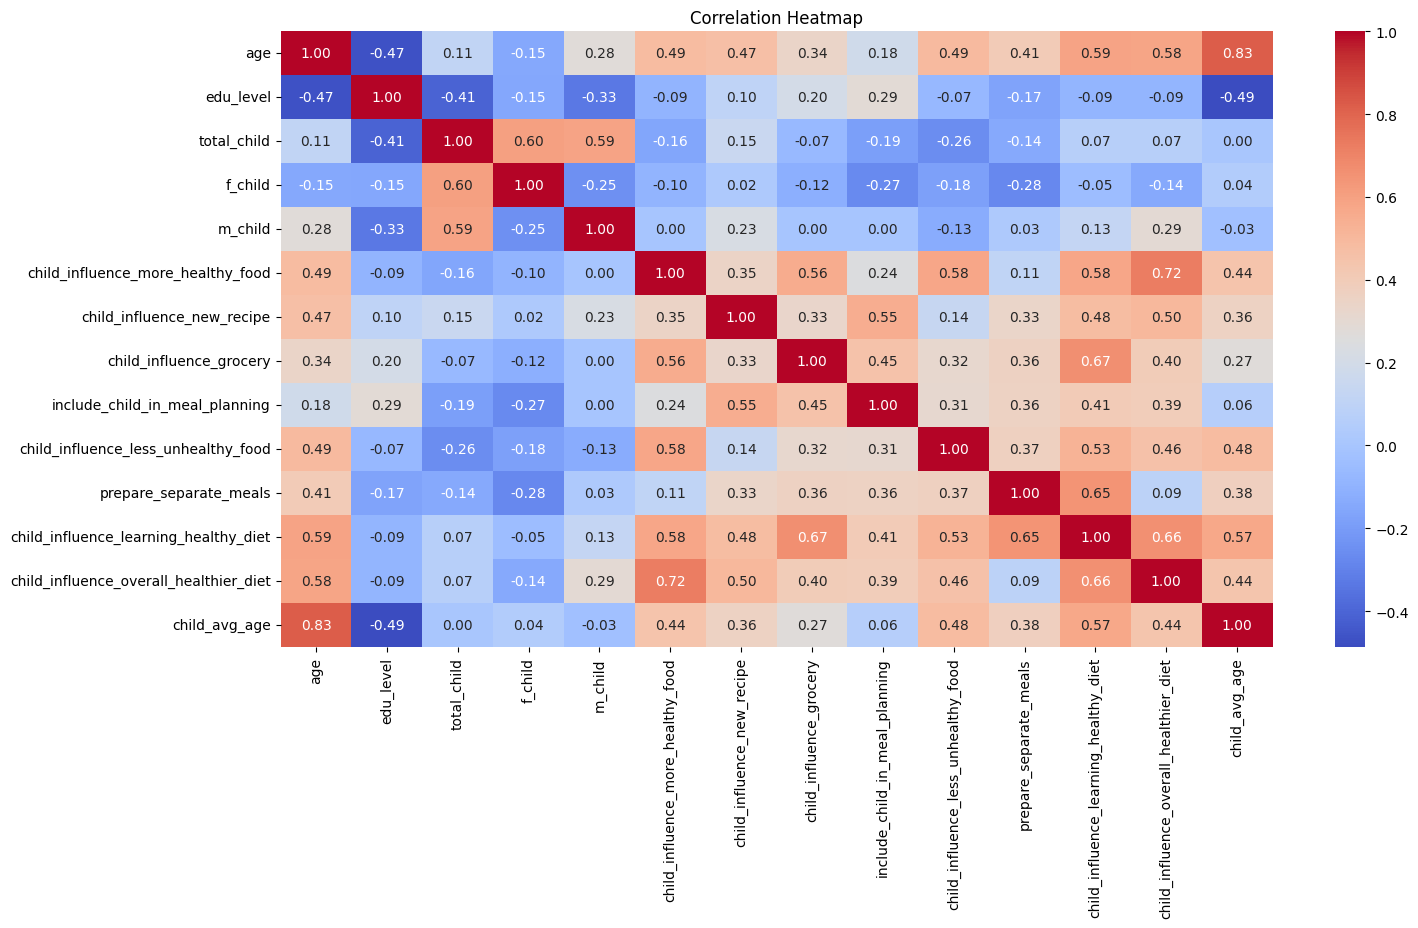

In [351]:
correlation_matrix = df_influence_factors_encoded[['age', 'edu_level', 'total_child', 'f_child', 'm_child',
       'child_influence_more_healthy_food', 'child_influence_new_recipe',
       'child_influence_grocery', 'include_child_in_meal_planning',
       'child_influence_less_unhealthy_food', 'prepare_separate_meals',
       'child_influence_learning_healthy_diet',
       'child_influence_overall_healthier_diet', 'child_avg_age']].corr()

plt.figure(figsize=(16, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

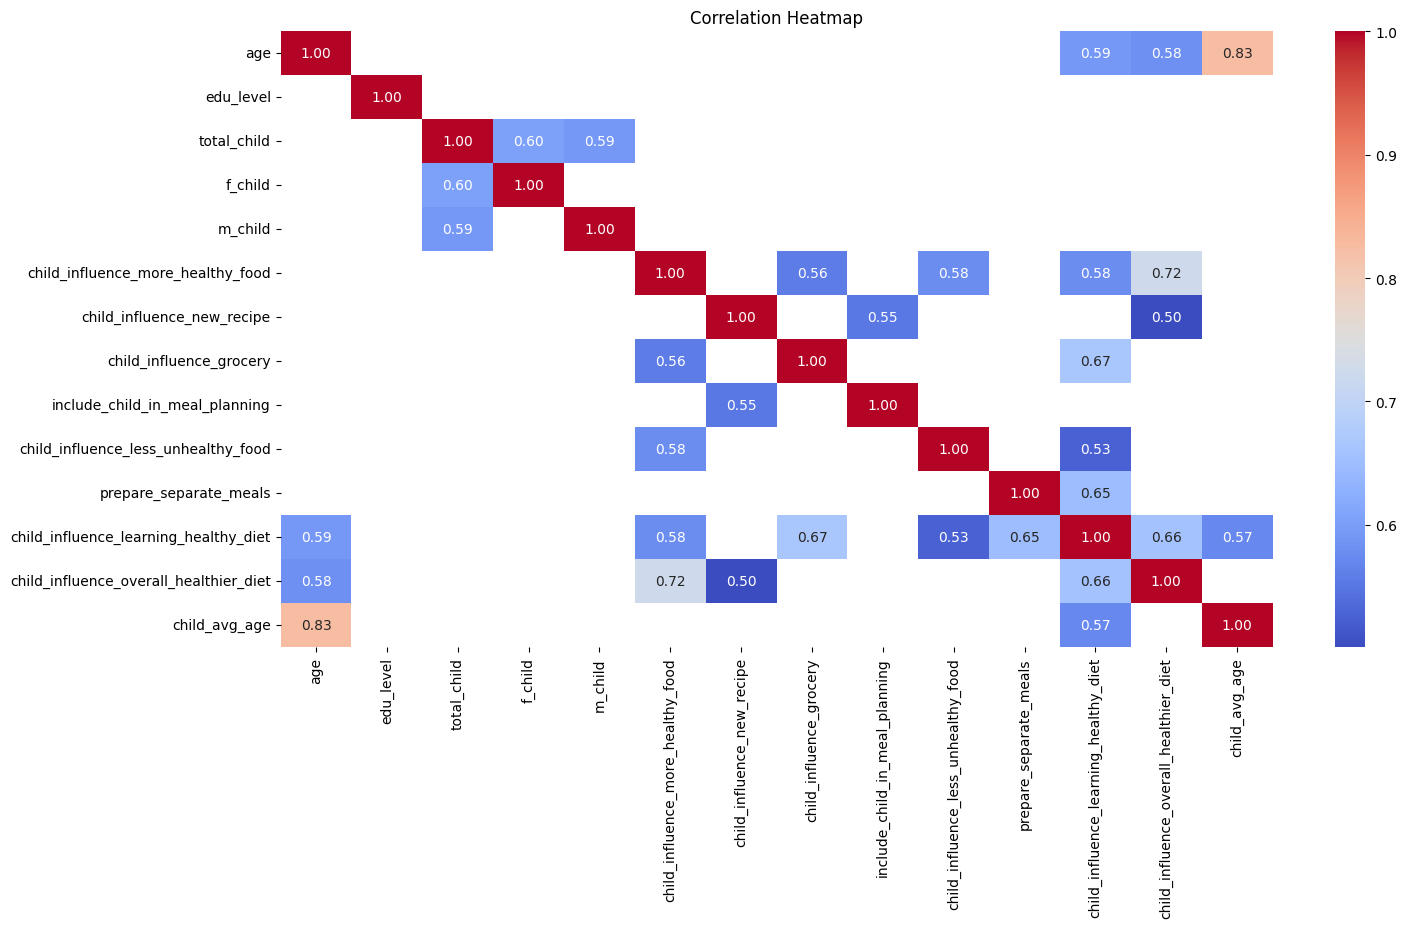

In [352]:
# Filter the correlation matrix
filtered_corr_matrix = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Display the filtered correlation matrix
filtered_corr_matrix = pd.DataFrame(filtered_corr_matrix)

plt.figure(figsize=(16, 8))  # Adjust the figure size if needed
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Same thing but fields are normalised

In [353]:
from sklearn.preprocessing import StandardScaler

variables = ['age', 'edu_level', 'total_child', 'f_child', 'm_child',
       'child_influence_more_healthy_food', 'child_influence_new_recipe',
       'child_influence_grocery', 'include_child_in_meal_planning',
       'child_influence_less_unhealthy_food', 'prepare_separate_meals',
       'child_influence_learning_healthy_diet',
       'child_influence_overall_healthier_diet', 'child_avg_age']
x = df_influence_factors_encoded[variables]
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=variables)
x = x.fillna(x.mean())

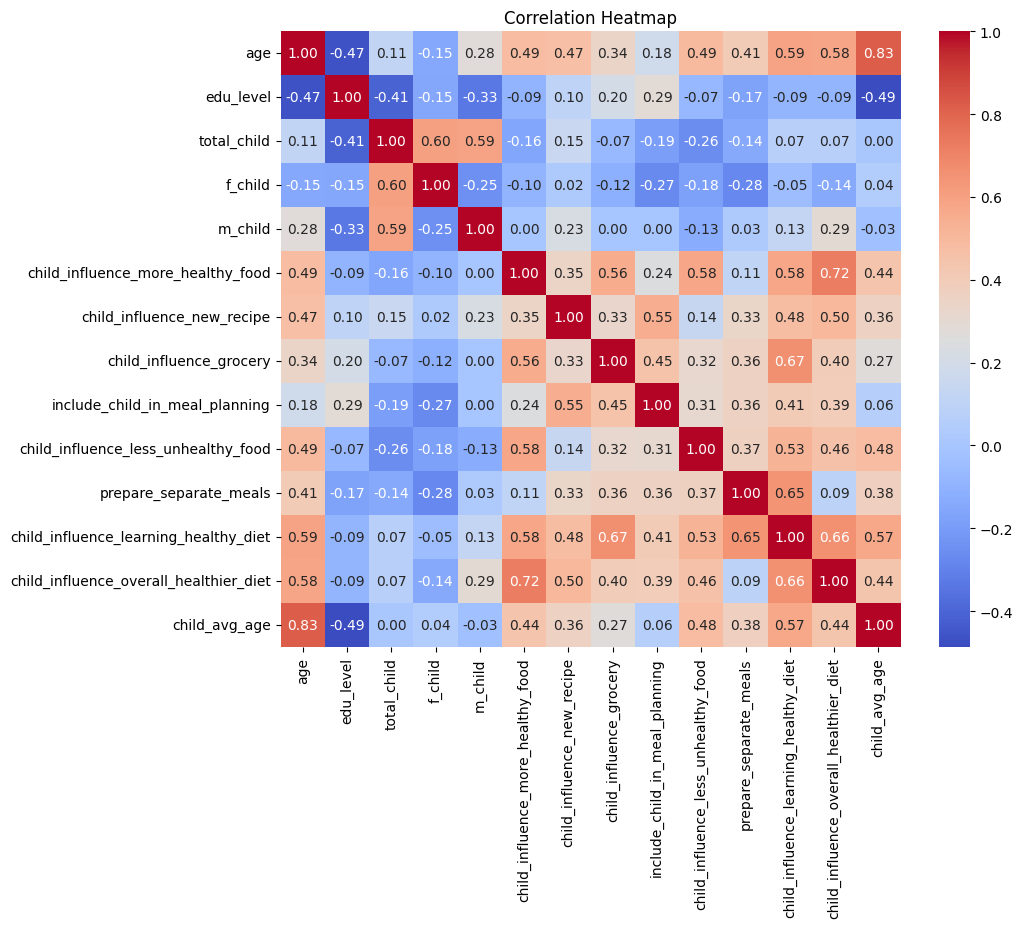

In [354]:
correlation_matrix_x = x[['age', 'edu_level', 'total_child', 'f_child', 'm_child',
       'child_influence_more_healthy_food', 'child_influence_new_recipe',
       'child_influence_grocery', 'include_child_in_meal_planning',
       'child_influence_less_unhealthy_food', 'prepare_separate_meals',
       'child_influence_learning_healthy_diet',
       'child_influence_overall_healthier_diet', 'child_avg_age']].corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

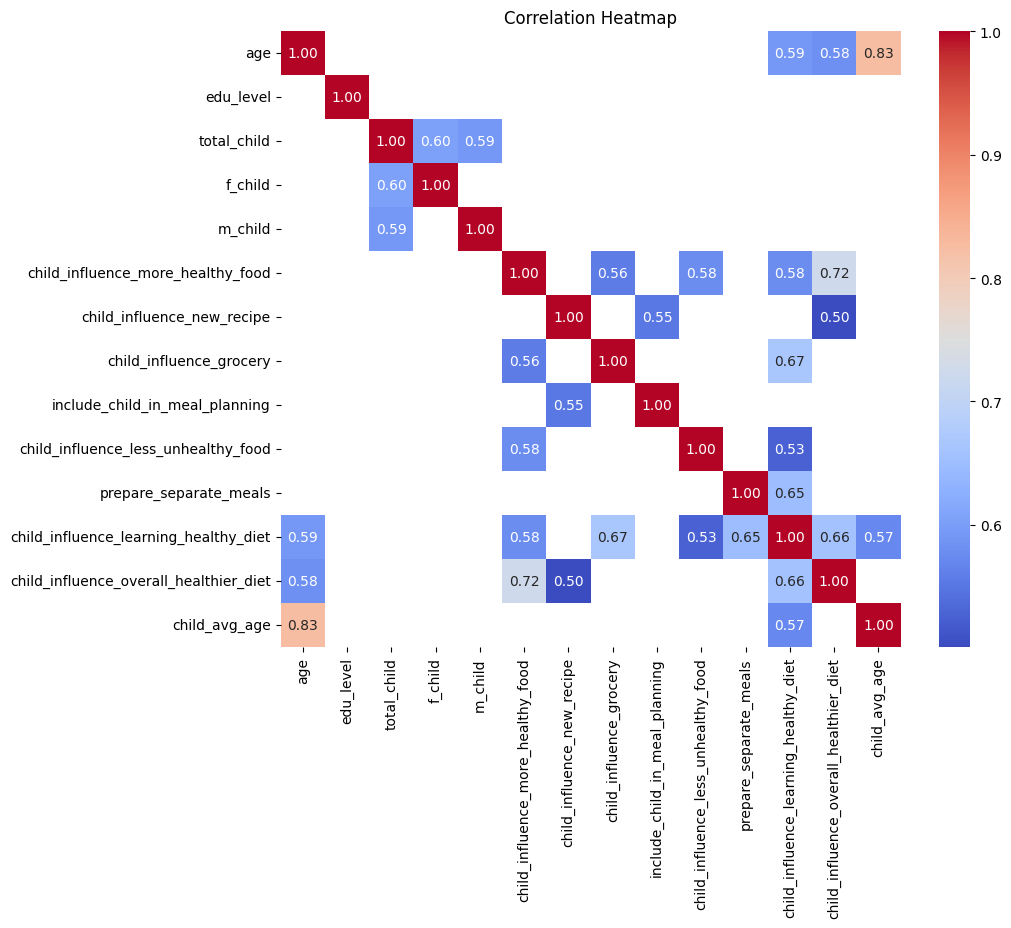

In [355]:
# Filter the correlation matrix
filtered_corr_matrix_x = correlation_matrix_x[(correlation_matrix_x >= 0.5) | (correlation_matrix_x <= -0.5)]

# Display the filtered correlation matrix
filtered_corr_matrix_x = pd.DataFrame(filtered_corr_matrix_x)

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(filtered_corr_matrix_x, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Average level of influence

<Axes: >

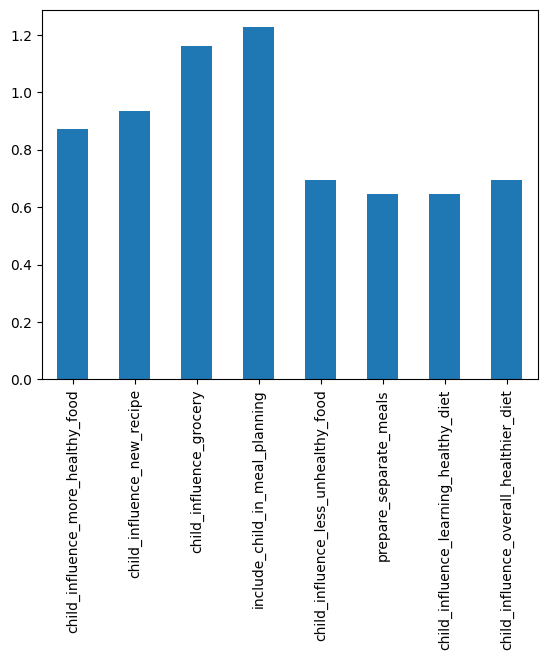

In [356]:
df_influence_factors_encoded[[ 'child_influence_more_healthy_food', 'child_influence_new_recipe',
    'child_influence_grocery', 'include_child_in_meal_planning',
    'child_influence_less_unhealthy_food', 'prepare_separate_meals',
    'child_influence_learning_healthy_diet', 'child_influence_overall_healthier_diet']].mean().plot(kind='bar')

#### Influence with respect to gender

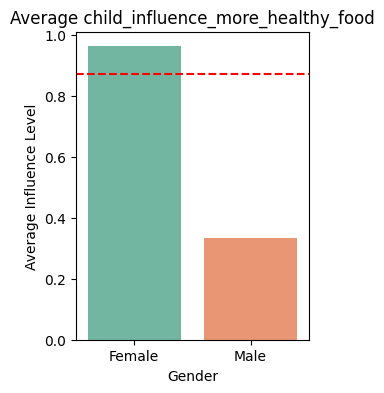

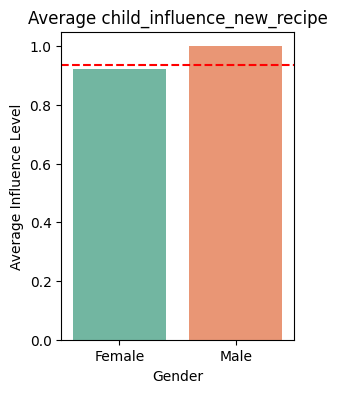

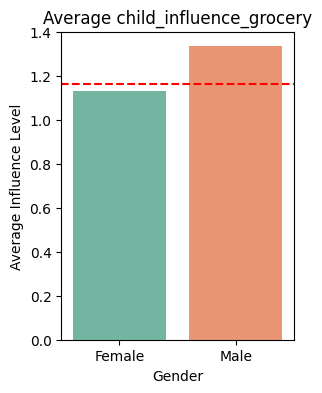

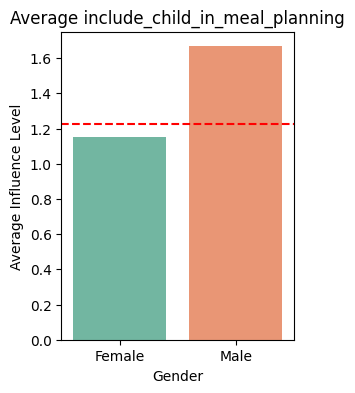

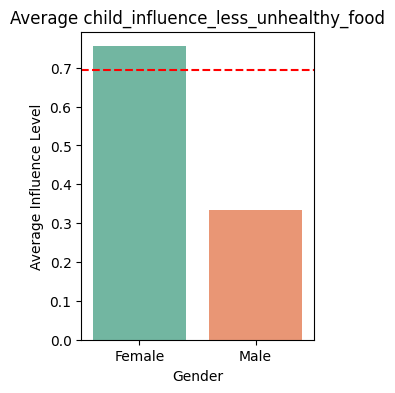

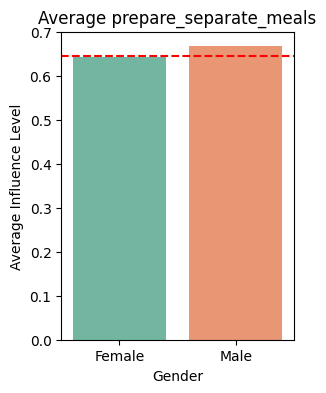

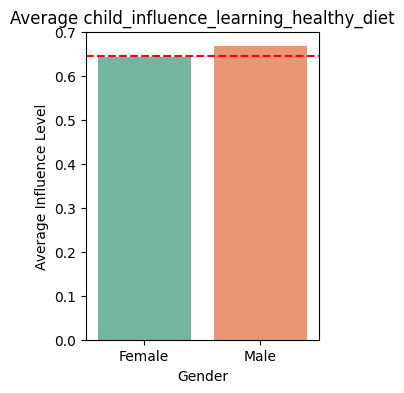

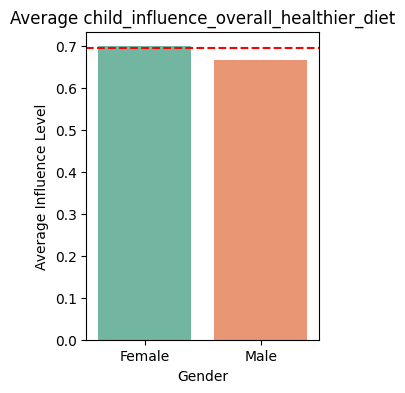

In [357]:
for variable in influence_variables:
    average_influence_level = df_influence_factors_encoded.groupby('gender')[variable].mean()
    overall_influence_level = df_influence_factors_encoded[variable].mean()

    plt.figure(figsize=(3, 4))  # Adjust the figure size if needed
    sns.barplot(x=average_influence_level.index, y=average_influence_level.values, palette='Set2', label='Average Influence Level')
    plt.axhline(overall_influence_level, color='red', linestyle='--', label=f'Overall Average {variable}')

    plt.xlabel('Gender')
    plt.ylabel(f'Average Influence Level')
    plt.title(f'Average {variable}')
    # plt.legend()
    plt.show()

#### Influence with respect to ethnicity

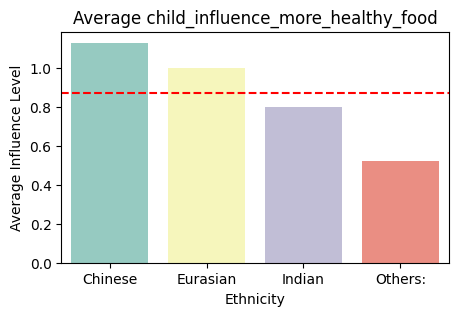

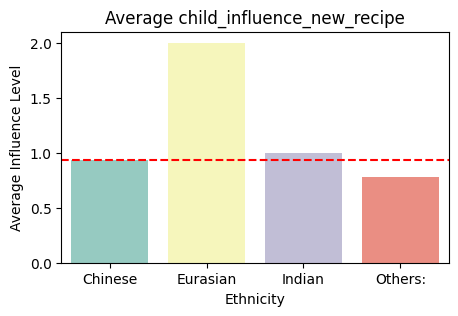

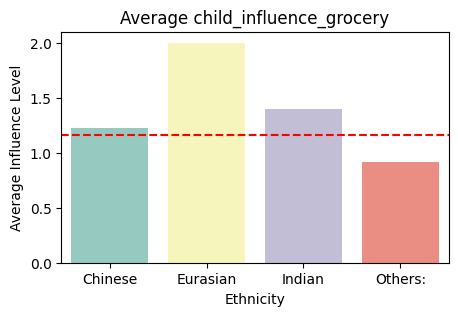

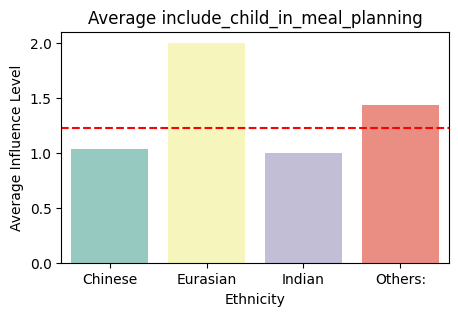

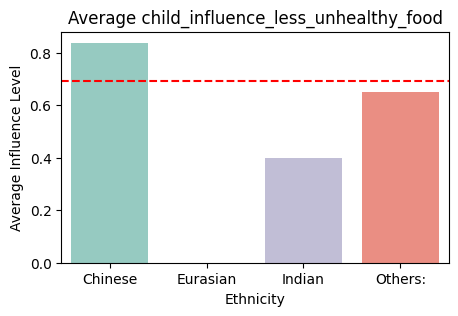

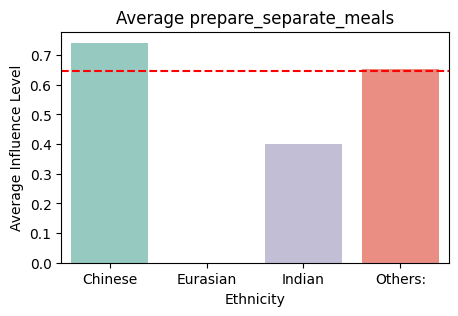

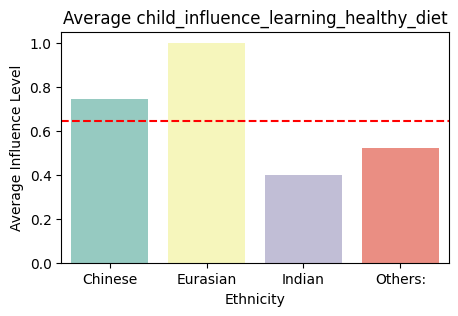

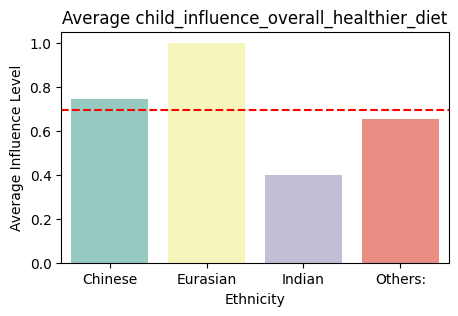

In [358]:
for variable in influence_variables:
    average_influence_level = df_influence_factors_encoded.groupby('ethnicity')[variable].mean()
    overall_influence_level = df_influence_factors_encoded[variable].mean()

    plt.figure(figsize=(5, 3))  # Adjust the figure size if needed
    sns.barplot(x=average_influence_level.index, y=average_influence_level.values, palette='Set3', label='Average Influence Level')
    plt.axhline(overall_influence_level, color='red', linestyle='--', label=f'Overall Average {variable}')

    plt.xlabel('Ethnicity')
    plt.ylabel(f'Average Influence Level')
    plt.title(f'Average {variable}')
    # plt.legend()
    plt.show()


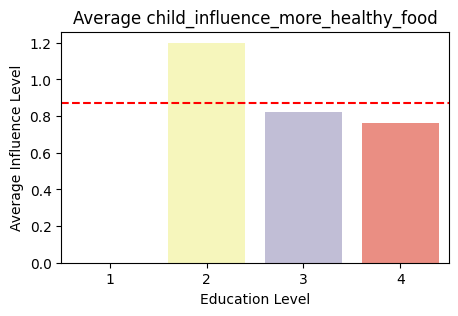

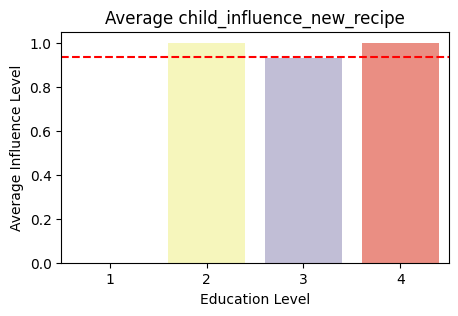

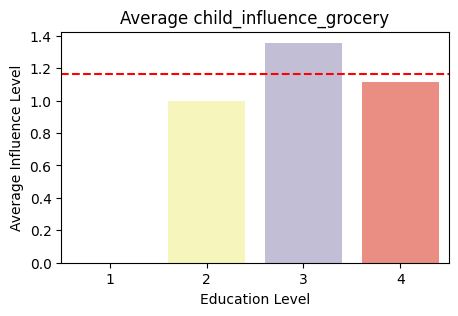

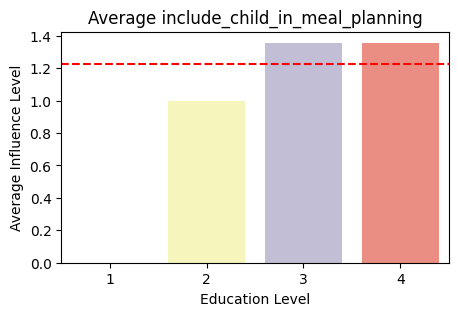

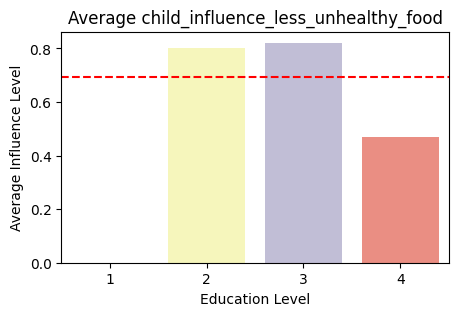

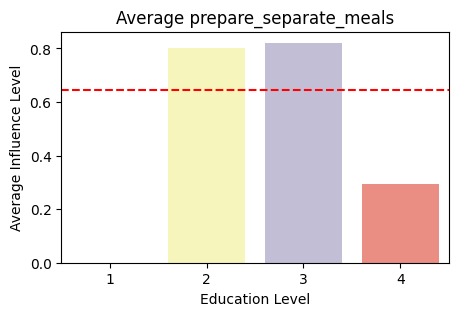

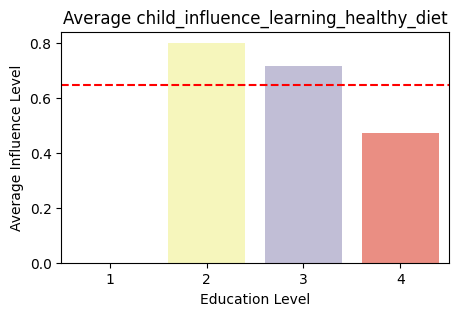

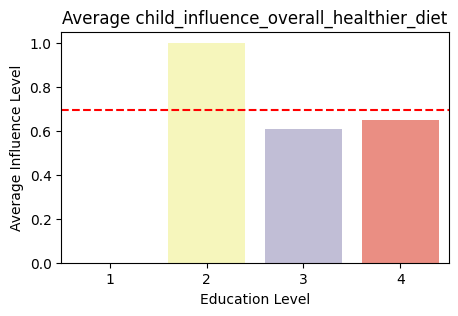

In [359]:
for variable in influence_variables:
    average_influence_level = df_influence_factors_encoded.groupby('edu_level')[variable].mean()
    overall_influence_level = df_influence_factors_encoded[variable].mean()

    plt.figure(figsize=(5, 3))  # Adjust the figure size if needed
    sns.barplot(x=average_influence_level.index, y=average_influence_level.values, palette='Set3', label='Average Influence Level')
    plt.axhline(overall_influence_level, color='red', linestyle='--', label=f'Overall Average {variable}')

    plt.xlabel('Education Level')
    plt.ylabel(f'Average Influence Level')
    plt.title(f'Average {variable}')
    # plt.legend()
    plt.show()

#### Reasons for influence (or lack of thereof)

In [360]:
reasons_to_count = {}
for i in range (0, df_influence_factors_encoded.shape[0]):
    list_of_responses = df['reasons_child_influence'].iloc[i].split(", ")
    
    for one_response in list_of_responses:
        if one_response in reasons_to_count:
            reasons_to_count[one_response] += 1
        else:
            reasons_to_count[one_response] = 1
   

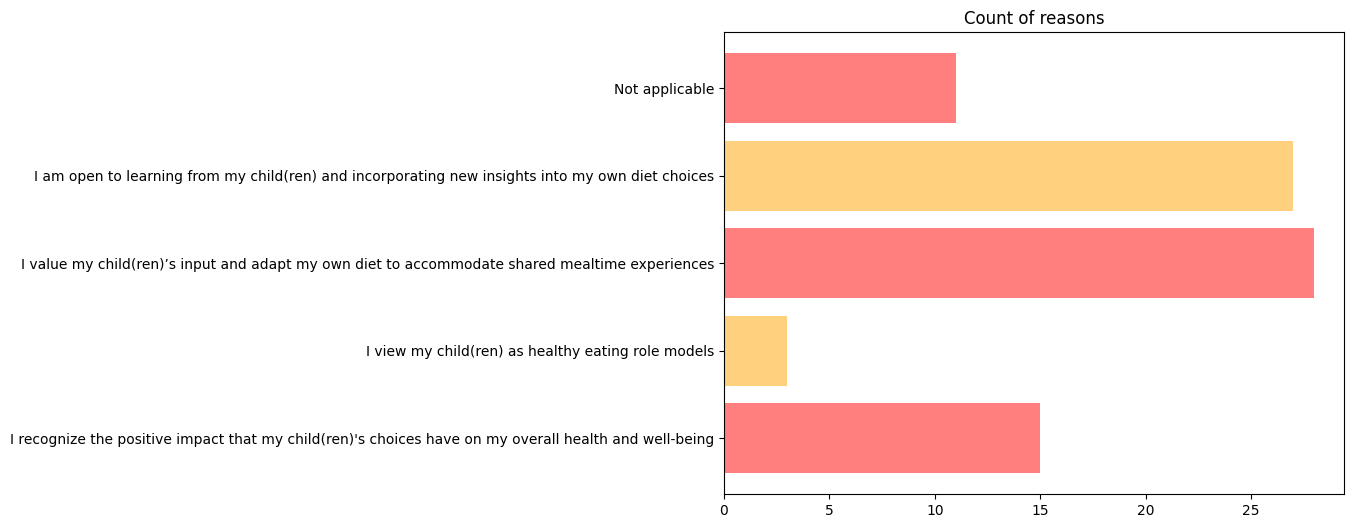

In [361]:
reasons = list(reasons_to_count.keys())
counts = list(reasons_to_count.values())

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.barh(reasons, counts, alpha=0.5, color=['red', 'orange'])
plt.title('Count of reasons')
plt.show()


In [362]:
reasons_to_count = {}
for i in range (0, df_influence_factors_encoded.shape[0]):
    list_of_responses = df['reasons_no_child_influence'].iloc[i].split(", ")
    
    for one_response in list_of_responses:
        if one_response in reasons_to_count:
            reasons_to_count[one_response] += 1
        else:
            reasons_to_count[one_response] = 1

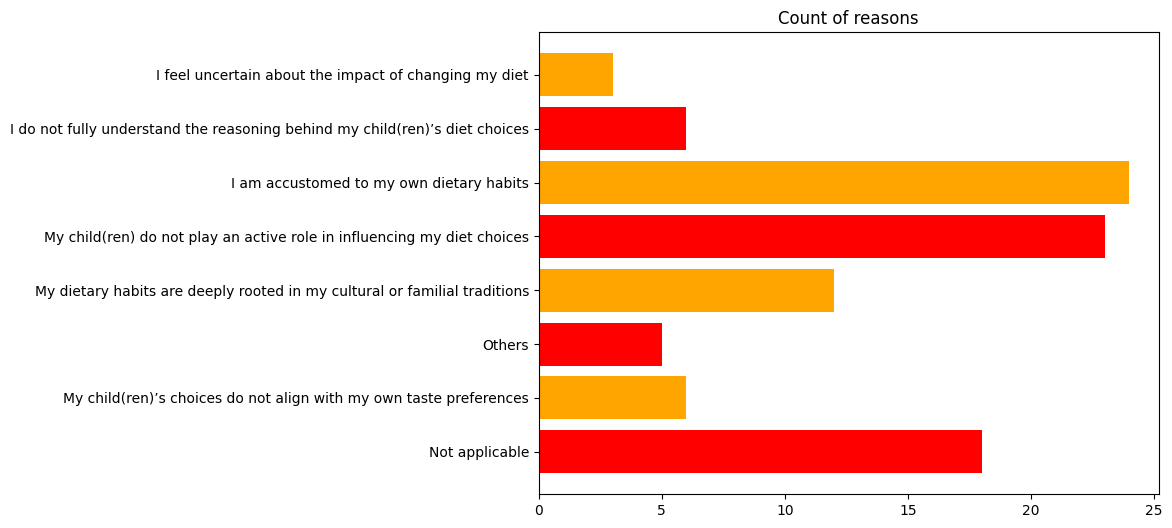

In [363]:
reasons = list(reasons_to_count.keys())
counts = list(reasons_to_count.values())

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.barh(reasons, counts, color=['red', 'orange'])
plt.title('Count of reasons')
plt.show()

In [364]:
df_influence_factors_encoded.keys()

Index(['gender', 'age', 'ethnicity', 'edu_level', 'total_child', 'f_child',
       'f_child_age', 'm_child', 'm_child_age',
       'child_influence_more_healthy_food', 'child_influence_new_recipe',
       'child_influence_grocery', 'include_child_in_meal_planning',
       'child_influence_less_unhealthy_food', 'prepare_separate_meals',
       'child_influence_learning_healthy_diet',
       'child_influence_overall_healthier_diet', 'reasons_child_influence',
       'reasons_no_child_influence', 'reasons_no_child_influence_o',
       'child_avg_age'],
      dtype='object')

### Decision tree

In [365]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [366]:
# decoder = {0: 'No', 1: 'Yes', 2: 'Yes'}
# Decode influence level variables
df_influence_factors_encoded['child_influence_overall_healthier_diet_decoded'] = 0

for i in range (0, df_influence_factors_encoded.shape[0]):

    response = df_influence_factors_encoded.at[i, 'child_influence_overall_healthier_diet']
    
    # Encode
    if response == 2:
        df_influence_factors_encoded.at[i, 'child_influence_overall_healthier_diet_decoded'] = 1

In [367]:
# Assuming your DataFrame 'df' has the following structure:
feature_cols = [
       'child_influence_more_healthy_food', 'child_influence_new_recipe',
       'child_influence_grocery', 'include_child_in_meal_planning',
       'child_influence_less_unhealthy_food', 'prepare_separate_meals',
       'child_influence_learning_healthy_diet']
target_col = 'child_influence_overall_healthier_diet'
all_cols = [
       'child_influence_more_healthy_food', 'child_influence_new_recipe',
       'child_influence_grocery', 'include_child_in_meal_planning',
       'child_influence_less_unhealthy_food', 'prepare_separate_meals',
       'child_influence_learning_healthy_diet', 'child_influence_overall_healthier_diet']
n_var = 3

# Separate the features and target variable
X = df_influence_factors_encoded[feature_cols]
y = df_influence_factors_encoded[target_col]

# 2. Feature Importance (Random Forest):
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
feature_importances = pd.DataFrame({'Feature': feature_cols, 'Importance': clf.feature_importances_})
selected_features_importance = feature_importances.nlargest(n_var, 'Importance')['Feature'].tolist()

# 3. Correlation Analysis:
correlation_matrix = df_influence_factors_encoded[all_cols].corr()
correlation_with_target = correlation_matrix['child_influence_overall_healthier_diet'].abs().sort_values(ascending=False)
selected_features_correlation = correlation_with_target[1:n_var+1].index.tolist()

# 4. Recursive Feature Elimination (RFE):
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=n_var)
fit = rfe.fit(X, y)
selected_features_rfe = [feature_cols[i] for i, selected in enumerate(fit.support_) if selected]

# 5. Univariate Feature Selection (SelectKBest with chi-squared):
selector = SelectKBest(score_func=chi2, k=n_var)
X_new = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features_chi2 = [feature_cols[i] for i in selected_feature_indices]

# Print selected features for each method
print("Selected Features (Feature Importance):", selected_features_importance)
print("Selected Features (Correlation Analysis):", selected_features_correlation)
print("Selected Features (RFE):", selected_features_rfe)
print("Selected Features (Univariate - Chi-squared):", selected_features_chi2)


Selected Features (Feature Importance): ['child_influence_more_healthy_food', 'child_influence_learning_healthy_diet', 'child_influence_new_recipe']
Selected Features (Correlation Analysis): ['child_influence_more_healthy_food', 'child_influence_learning_healthy_diet', 'child_influence_new_recipe']
Selected Features (RFE): ['child_influence_more_healthy_food', 'child_influence_new_recipe', 'child_influence_learning_healthy_diet']
Selected Features (Univariate - Chi-squared): ['child_influence_more_healthy_food', 'child_influence_less_unhealthy_food', 'child_influence_learning_healthy_diet']


#### Based on Random Forest feature importance, correlation analysis, RFE

In [368]:
X = df_influence_factors_encoded[selected_features_importance]
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [369]:
# Train model
clf = DecisionTreeClassifier(criterion='gini')  
clf.fit(X_train, y_train)

DecisionTreeClassifier()

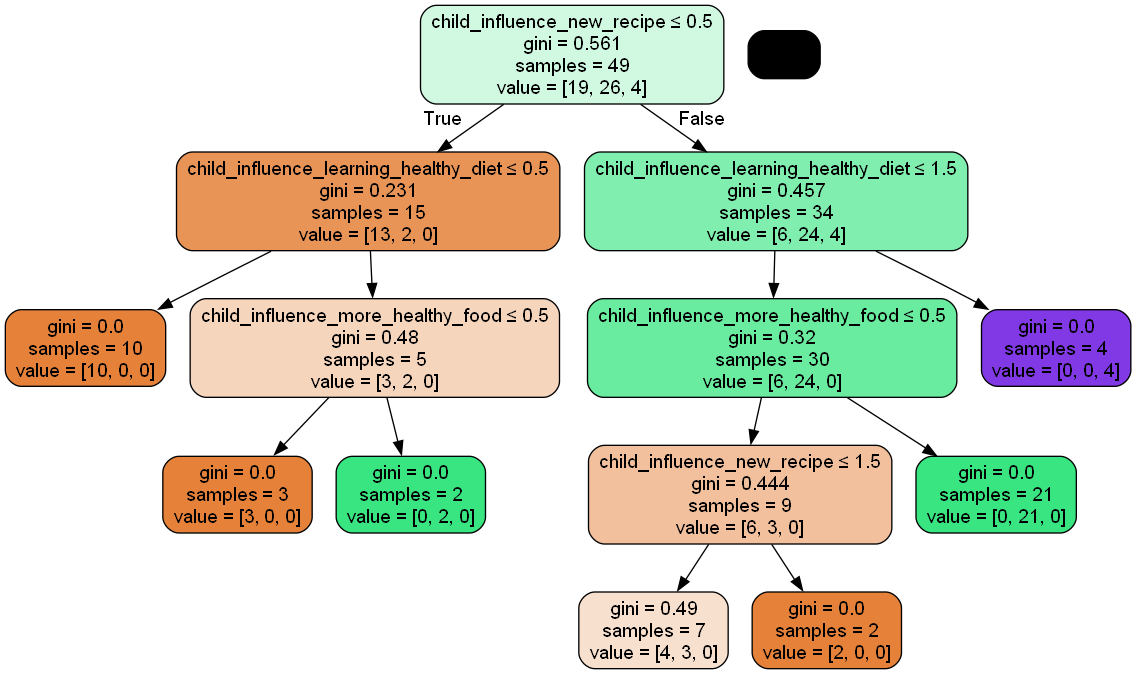

In [370]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO  
from IPython.display import Image

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, 
                      feature_names = selected_features_importance,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [371]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [372]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f_measure = metrics.f1_score(y_test, predictions)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-measure: 1.0


### Based on Univariate feature selection

In [373]:
X = df_influence_factors_encoded[selected_features_chi2]
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [374]:
# Train model
clf = DecisionTreeClassifier(criterion='entropy')  
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

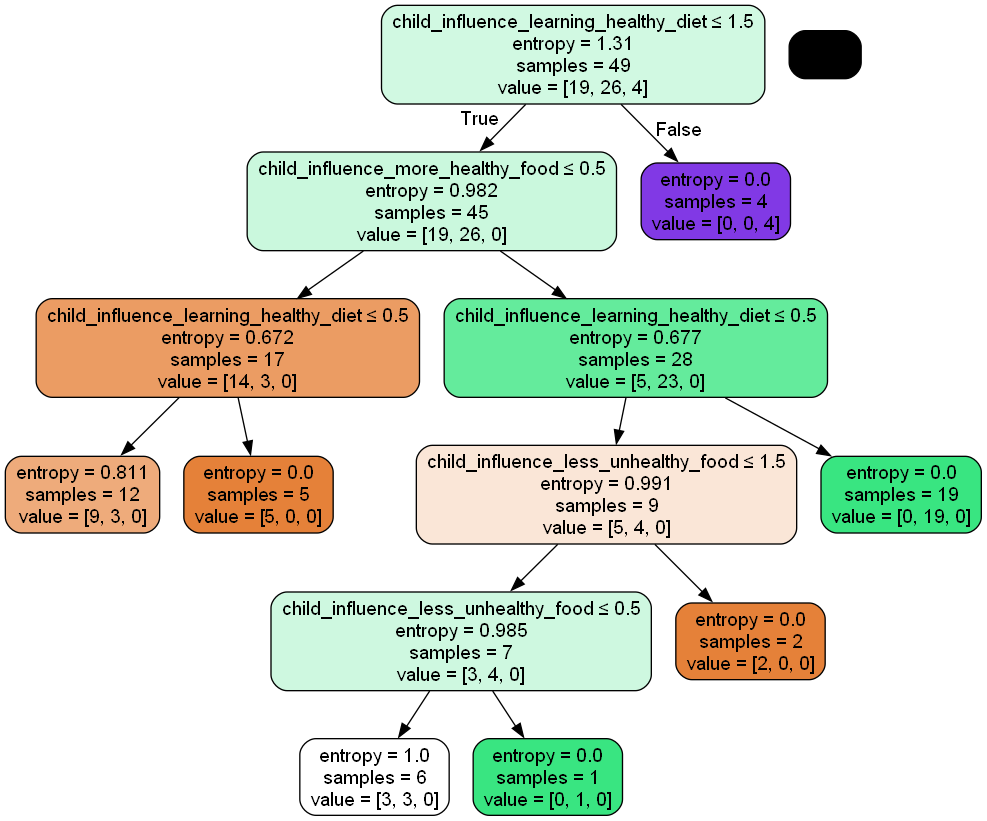

In [375]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, 
                      feature_names = selected_features_chi2,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [376]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [377]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f_measure = metrics.f1_score(y_test, predictions)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-measure: 1.0


In [378]:
# Train model
clf_lg = LogisticRegression() 
clf_lg.fit(X_train, y_train)

LogisticRegression()

In comparison with Logistic Regression

In [379]:
# Compare results
lg_predictions = clf_lg.predict(X_test)
lg_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lg_predictions})
lg_results_df.sample(10)

,Actual,Predicted
2,1,1
4,1,1
48,0,0
45,0,0
43,1,1
33,1,1
30,0,0
11,1,1
32,1,1
35,1,1


In [380]:
# Accuracy
lg_accuracy = accuracy_score(y_test,lg_predictions)
print("Accuracy:", lg_accuracy)

Accuracy: 1.0


In [381]:
# Precision and Recall
lg_precision = metrics.precision_score(y_test, lg_predictions)
lg_recall = metrics.recall_score(y_test, lg_predictions)
lg_f_measure = metrics.f1_score(y_test, lg_predictions)
print("Precision:",lg_precision)
print("Recall:",lg_recall)
print("F-measure:",lg_f_measure)

Precision: 1.0
Recall: 1.0
F-measure: 1.0
